In [15]:
import pandas as pd
import seaborn as sns

In [2]:
orig_test=pd.read_csv('option_test_wolabel.csv')
orig_train=pd.read_csv('option_train.csv')

In [5]:
orig_test.columns

Index(['S', 'K', 'tau', 'r'], dtype='object')

In [4]:
orig_train.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [6]:
# Value (C): numerical y
# S + K + tau + r : possible x
# BS: categorical y

In [14]:
orig_train.describe()

,Value,S,K,tau,r
count,1679.000000,1679.000000,1678.000000,1679.000000,1680.000000
mean,15.072013,440.639445,438.241955,0.437519,0.030235
std,14.036492,13.130436,23.408989,7.057555,0.000557
min,0.125000,0.000000,375.000000,0.003968,0.029510
25%,2.255002,433.863864,420.000000,0.119048,0.029820
50%,11.220588,442.525366,440.000000,0.202381,0.030130
75%,25.745904,447.320414,455.000000,0.285714,0.030540
max,60.149367,455.880619,500.000000,250.000000,0.031880


In [11]:
orig_train[orig_train['tau'].isnull()]

,Value,S,K,tau,r,BS
292,8.625,NaN,NaN,NaN,0.03003,Over


In [12]:
orig_train[orig_train['Value'].isnull()]

,Value,S,K,tau,r,BS
818,NaN,431.284616,NaN,0.230159,0.02972,Over


<AxesSubplot:xlabel='Value'>

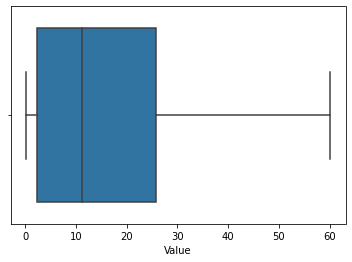

In [17]:
sns.boxplot(x='Value',data=orig_train)

<AxesSubplot:xlabel='S'>

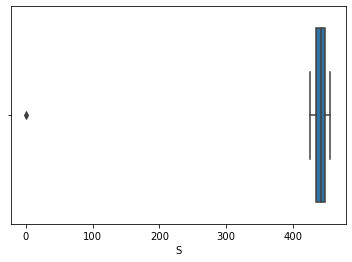

In [18]:
sns.boxplot(x='S',data=orig_train)

In [19]:
orig_train[orig_train['S']<400]

,Value,S,K,tau,r,BS
879,4.125,0.0,455.0,0.170635,0.03003,Over


<AxesSubplot:xlabel='K'>

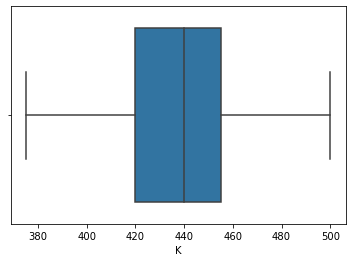

In [20]:
sns.boxplot(x='K',data=orig_train)

<AxesSubplot:xlabel='tau'>

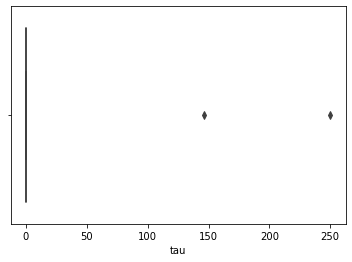

In [21]:
sns.boxplot(x='tau',data=orig_train)

In [22]:
orig_train[orig_train['tau']>50]

,Value,S,K,tau,r,BS
12,2.315001,448.688109,470.0,250.0,0.03013,Over
33,2.565000,445.042240,455.0,146.0,0.03003,Over


<AxesSubplot:xlabel='r'>

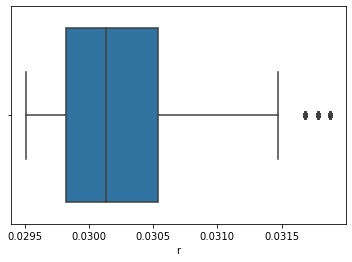

In [23]:
sns.boxplot(x='r',data=orig_train)

In [36]:
orig_train[orig_train['r']>0.0315]

,Value,S,K,tau,r,BS
11,30.959515,432.350471,405.0,0.174603,0.03168,Under
35,6.750002,431.020394,440.0,0.285714,0.03168,Over
38,54.875996,430.638719,380.0,0.289683,0.03178,Under
116,27.904735,431.020394,410.0,0.285714,0.03168,Under
126,6.500003,430.638719,440.0,0.289683,0.03178,Over
...,...,...,...,...,...,...
1572,32.356754,426.025007,400.0,0.281746,0.03188,Under
1655,0.440002,426.025007,465.0,0.281746,0.03188,Over
1662,6.379346,434.638107,430.0,0.035714,0.03168,Over
1671,34.550891,433.886762,400.0,0.039683,0.03178,Under


In [37]:
orig_train['BS_binary']=orig_train['BS'].map({'Under':0, 'Over':1})

In [38]:
orig_train.head()

,Value,S,K,tau,r,BS,BS_binary
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0


In [42]:
orig_train.drop(labels=[12,33,292,818,879], axis=0,inplace=True)

In [43]:
orig_train.head(15)

,Value,S,K,tau,r,BS,BS_binary
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0
5,2.505002,436.958530,460.0,0.333333,0.03023,Over,1
6,4.315000,427.015526,435.0,0.166667,0.03126,Over,1
7,0.345002,428.996368,455.0,0.154762,0.03116,Over,1
8,27.297423,444.186127,420.0,0.150794,0.02993,Under,0
9,0.190000,429.314292,460.0,0.150794,0.03085,Over,1


In [44]:
orig_train[orig_train['tau']>50]

,Value,S,K,tau,r,BS,BS_binary


In [45]:
orig_train.to_csv('option_clean_train.csv')